Generating new samples (unlabeled) as a cutmix of existing samples
. i am taking two random samples from the entire dataset of 50k, using a lambda chosen from a beta distribution and then adding them using the lambda formula mentioned in the paper. In an extreme case of lamda, the resulting y will still be one-hot, in which case cut mix did not happen. I am discarding these and generating 50k mixed up images. Let these be called as unlabeled data for cutmix.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import random
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [0]:
ROOT = '/content/drive/My Drive/19 Fall/CSE 569/Project/cifar/labeled'

In [4]:
_X = []
_y = []
for i in range(10):
  _X.append(pickle.load(open(ROOT + '/X_train_label' + str(i), mode='rb')))
  _y.append(pickle.load(open(ROOT + '/y_train_label' + str(i), mode='rb')))
  print(i, _X[i].shape, _y[i].shape)

X_labeled = np.vstack(_X)
y_labeled = np.vstack(_y)

print(X_labeled.shape, y_labeled.shape)

0 (5000, 32, 32, 3) (5000, 10)
1 (5000, 32, 32, 3) (5000, 10)
2 (5000, 32, 32, 3) (5000, 10)
3 (5000, 32, 32, 3) (5000, 10)
4 (5000, 32, 32, 3) (5000, 10)
5 (5000, 32, 32, 3) (5000, 10)
6 (5000, 32, 32, 3) (5000, 10)
7 (5000, 32, 32, 3) (5000, 10)
8 (5000, 32, 32, 3) (5000, 10)
9 (5000, 32, 32, 3) (5000, 10)
(50000, 32, 32, 3) (50000, 10)


In [10]:
N = len(X_labeled)
alpha = 1
print(N, alpha)

50000 1


In [11]:
lambdaa = np.random.beta(alpha, alpha, N)
X_lambdaa = lambdaa.reshape(N, 1, 1, 1)
print(X_lambdaa.shape)

(50000, 1, 1, 1)


In [0]:
X_unlabeled = np.zeros((N, 32, 32, 3))
y_unlabeled = np.zeros((N, 10))

In [0]:
def get_rand_bbox(width, height, l):
  r_x = np.random.randint(width)
  r_y = np.random.randint(height)
  r_l = np.sqrt(1 - l)
  r_w = np.int(width * r_l)
  r_h = np.int(height * r_l)
  bb_x_1 = np.clip(r_x - r_w // 2, 0, width)
  bb_y_1 = np.clip(r_y - r_h // 2, 0, height)
  bb_x_2 = np.clip(r_x + r_w // 2, 0, width)
  bb_y_2 = np.clip(r_y + r_h // 2, 0, height)
  return bb_x_1, bb_y_1, bb_x_2, bb_y_2

In [0]:
for i in range(N):
  while True:
    r = random.sample(range(0, 50000), 2)
    X = np.copy(X_labeled[r[0]])
    X_s = X_labeled[r[1]]
    y = np.copy(y_labeled[r[0]])
    y_s = y_labeled[r[1]]

    lam = X_lambdaa[r[0]]
    h, w, _ = X.shape
    bx1, by1, bx2, by2 = get_rand_bbox(w, h, lam)
    X[bx1:bx2, by1:by2, :] = X_s[bx1:bx2, by1:by2, :]

    lam = 1 - (bx2 - bx1) * (by2 - by1) / (w * h)
    y = y * lam + y_s * (1 - lam)
    if np.max(y) > 0.9:
      # extreme lambda case, y is still hot! or skewed
      continue
    else:
      X_unlabeled[i] = X
      y_unlabeled[i] = y
      break

In [19]:
# Check if balanced
np.sum(y_unlabeled, 0) * 10 / N

array([0.99653477, 0.98904941, 1.01201563, 0.97874375, 1.02569453,
       0.9872123 , 0.99099707, 0.99493906, 1.02464375, 1.00016973])

In [0]:
pickle.dump(X_unlabeled, open(ROOT + '/X_train_CutMix', mode='wb'))
pickle.dump(y_unlabeled, open(ROOT + '/y_train_CutMix', mode='wb'))

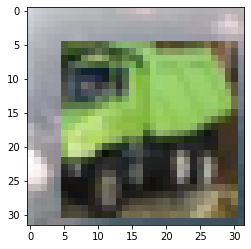

One-hot label: [0.33984375 0.         0.         0.         0.         0.
 0.         0.         0.         0.66015625]


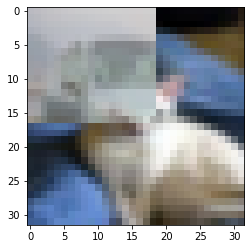

One-hot label: [0.         0.31542969 0.         0.68457031 0.         0.
 0.         0.         0.         0.        ]


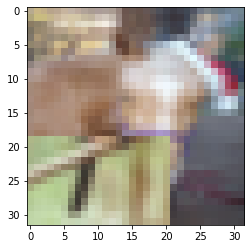

One-hot label: [0.         0.         0.26660156 0.         0.         0.
 0.         0.73339844 0.         0.        ]


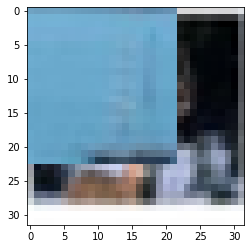

One-hot label: [0.         0.         0.         0.         0.50585938 0.
 0.         0.         0.49414062 0.        ]


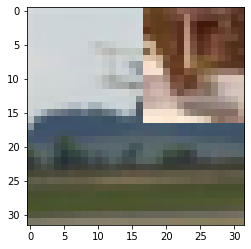

One-hot label: [0.75097656 0.24902344 0.         0.         0.         0.
 0.         0.         0.         0.        ]


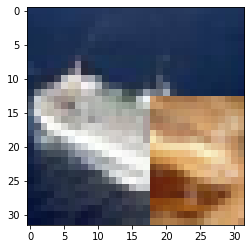

One-hot label: [0.         0.         0.         0.         0.         0.
 0.25976562 0.         0.74023438 0.        ]


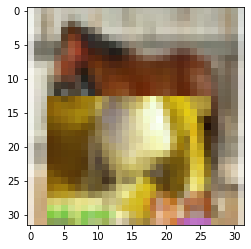

One-hot label: [0.        0.        0.        0.        0.        0.4453125 0.
 0.5546875 0.        0.       ]


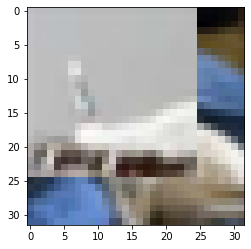

One-hot label: [0.61035156 0.         0.         0.38964844 0.         0.
 0.         0.         0.         0.        ]


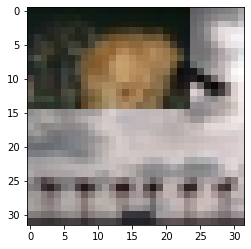

One-hot label: [0.6484375 0.        0.        0.        0.        0.3515625 0.
 0.        0.        0.       ]


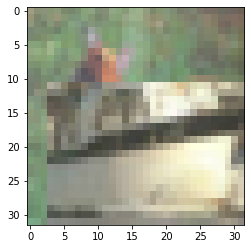

One-hot label: [0.         0.         0.         0.         0.40527344 0.
 0.         0.         0.59472656 0.        ]


In [21]:
for i in range(10):
    curr_img = X_unlabeled[i, :]
    plt.imshow(curr_img)
    plt.show()
    print("One-hot label:", y_unlabeled[i, :])